In [ ]:
#costfunction()函数

In [ ]:
#读取资料
import pandas as pd

url = "Salary_Data.csv"
data = pd.read_csv(url)
data 
# y = w*x + b 
x = data["YearsExperience"]
y = data["Salary"]



In [ ]:
w= 10
b= 0
y_pred = w*x +b 
cost = (y-y_pred)**2
#将所有的cost做和然后平均
cost.sum() / len(x)

602.547878787879

In [9]:
#封装成一个函数，方便带入不同的w和b
def compute_cost(x,y ,w,b):
    y_pred = w*x +b 
    cost = (y-y_pred)**2
    #将所有的cost做和然后平均
    cost = cost.sum() / len(x)
    return cost

In [12]:
compute_cost(x,y,10,0)

602.547878787879

In [ ]:
#b= 0 , w = -100到100，cost会是多少,用一个列表将所有的cost打印
costs = []
for w in range(-100 ,101):
    cost= compute_cost(x,y,w,0)
    costs.append(cost)
costs

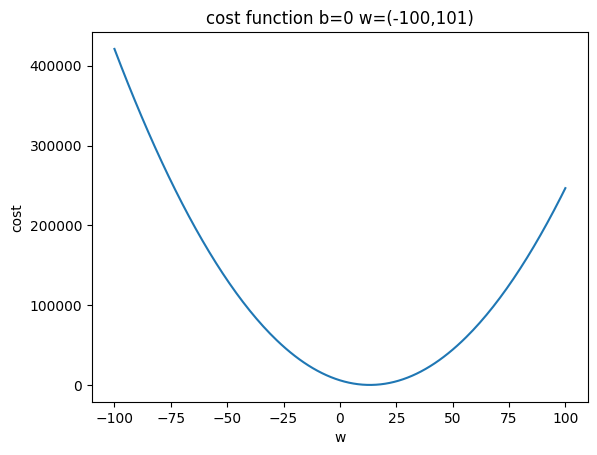

In [15]:
#画图
import matplotlib.pyplot as plt 
#plt.scatter(range(-100,101),costs)
plt.plot(range(-100,101),costs)
plt.title("cost function b=0 w=(-100,101)")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

In [18]:
#现在考虑 b = (-100,100) 时候的cost
import numpy as np 
ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201)) #这个矩阵用来存放不同的w和不同的b的时候的cost

#将结果存放进去
i =0 
for w in ws:
    j = 0
    for b in bs:
        cost = compute_cost(x,y,w,b)
        costs[i,j] = cost
        j+=1
    i+=1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

In [28]:
#添加中文
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mlp.rc("font",family="ChineseFont")

当 w = [9], b= [29]时,有最小的cost: [32.69484848]


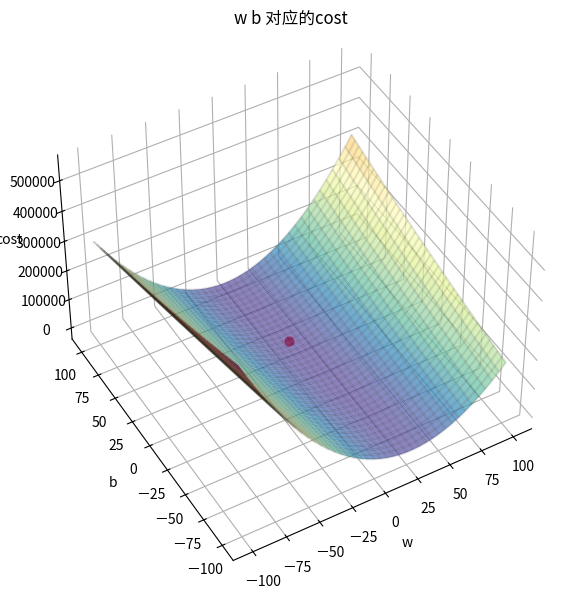

In [46]:
#同时考虑w和b画图，图是3D
plt.figure(figsize=(7,7))#初始设定图的宽度和高度
ax = plt.axes(projection="3d")

#旋转3D图,第一个上下旋转角度，第二个左右的旋转角度
ax.view_init(45,-120)

#用来将背景变成白色美观
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))


b_grid,w_grid = np.meshgrid(bs,ws)#用来产生网格

#绘制图形
ax.plot_surface(w_grid,b_grid, costs ,cmap="Spectral_r" , alpha = 0.7)
ax.plot_wireframe(w_grid , b_grid ,costs, color="black",alpha = 0.1)
ax.set_title("w b 对应的cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")
#找出最低的点
w_index,b_index = np.where(costs ==np.min((costs)))
print(f"当 w = {ws[w_index]}, b= {bs[b_index]}时,有最小的cost: {costs[w_index,b_index]}")
ax.scatter(ws[w_index] , bs[b_index] , costs[w_index , b_index] , color = "red" , s = 40)
plt.show()